# Создание нейронной сети на Torch

In [ ]:
import torch
import numpy as np
from IPython.display import Image, display

## Нейрон

<img src="img/neuron.png" width=300, heigth=300>

In [6]:
# Создание класса нейрон. weights - веса связей, bias - порог, input - вектор сигналов, подающихся на нейрон

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
  
  def forward(self, input):
    return torch.dot(self.weights, input) + self.bias # dot - скалярное произведение векторов

In [7]:
inputs = torch.tensor([1.0, 2.0, 3.0, 2.5])

weights = torch.tensor([0.2, 0.8, -0.5, 1.0])
bias = 2.0

neuron = Neuron(weights, bias)
neuron.forward(inputs)

tensor(4.8000)

## Слой

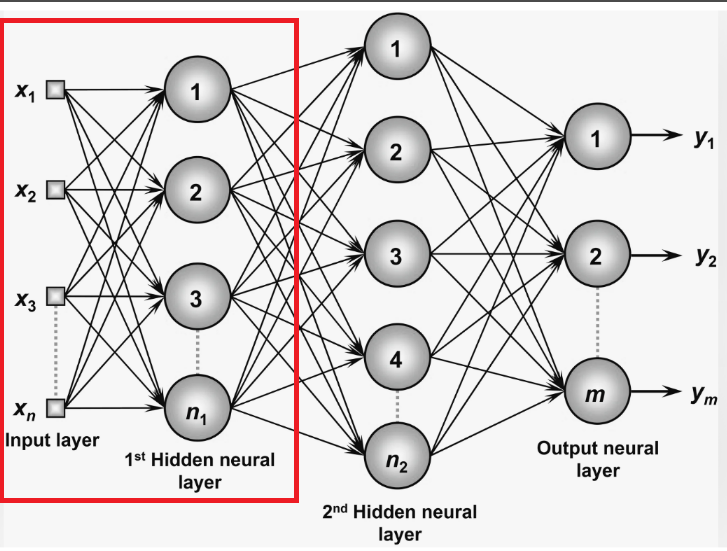

In [8]:
display(Image(filename="img/Layer.png", width=300, height=300))

In [9]:
class Layer:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
  
  def forward(self, input):
    return torch.mv(self.weights, input) + self.biases #mv - произведение вектора на матрицу

In [10]:
inputs = torch.tensor([1.0, 2.0, 3.0, 2.5])
weights = torch.tensor([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([2.0, 3.0, 0.5])

layer = Layer(weights, biases)
layer.forward(inputs)

tensor([4.8000, 1.2100, 2.3850])

## Слой (batch)
обработка партиями

In [11]:
class Layer:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
  
  def forward(self, inputs):
    return inputs @ self.weights.T + self.biases # провизведение матриц

In [12]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
weights1 = torch.tensor([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])
biases1 = torch.tensor([2.0, 3.0, 0.5])

weights2 = torch.tensor([[.1, -.14, .5], [-.5, .12, -.33], [-.44, .73, -.13]])
biases2 = torch.tensor([-1, 2, -.5])

layer1 = Layer(weights1, biases1)
hidden_input = layer1.forward(inputs1)

layer2 = Layer(weights2, biases2)
output = layer2.forward(hidden_input)
output

tensor([[ 0.5031, -1.0419, -2.0388],
        [ 0.2434, -2.7332, -5.7633],
        [-0.9931,  1.4125, -0.3565]])

## Слой (случ. иниц)

In [13]:
class Layer:
  def __init__(self, n_inputs, n_neurons):
    self.weights = torch.randn(n_inputs, n_neurons)
    self.biases = torch.zeros(n_neurons)
  
  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [14]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 6)
out = layer.forward(inputs1)
out

tensor([[-5.8383,  5.5637,  0.0871, -3.2132,  1.6952,  2.0587],
        [-5.0718, 11.6732, -1.8007, -1.3647, -0.2102,  3.3611],
        [-5.4915,  5.5296,  0.0898, -2.3052,  5.4215, -0.6183]])

## Функции активации

<img src="img/Act.png" width=500, heigth=300>

Функция активации ReLU:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)
Функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

In [15]:
# RELU
class ReLU:
  def forward(self, inputs):
    return inputs.clip(min=0)    # заменить отрицательные числа нулями

In [16]:
ReLU().forward(out)

tensor([[ 0.0000,  5.5637,  0.0871,  0.0000,  1.6952,  2.0587],
        [ 0.0000, 11.6732,  0.0000,  0.0000,  0.0000,  3.3611],
        [ 0.0000,  5.5296,  0.0898,  0.0000,  5.4215,  0.0000]])

In [17]:
class Softmax:
  def forward(self, inputs):
    exp = torch.exp(inputs)
    probs = exp / exp.sum(dim=1, keepdim=True)
    return probs 

In [18]:
Softmax().forward(out)

tensor([[1.0588e-05, 9.4761e-01, 3.9643e-03, 1.4619e-04, 1.9796e-02, 2.8475e-02],
        [5.3411e-08, 9.9974e-01, 1.4068e-06, 2.1757e-06, 6.9024e-06, 2.4547e-04],
        [8.5868e-06, 5.2509e-01, 2.2791e-03, 2.0780e-04, 4.7130e-01, 1.1226e-03]])

## Функции потерь

Функция потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)
Функция потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">


In [19]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 1)
out = layer.forward(inputs1)
out

tensor([[-2.9614],
        [-2.1364],
        [-2.9046]])

In [20]:
# Среднеквадратичная ошибка
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean(torch.pow(out - y_true, 2))

In [21]:
y_true = torch.tensor([2, 3, 4]).view(-1, 1)
MSELoss().forward(out, y_true)

tensor(32.8906)

In [22]:
# Кроссэнтропия
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    correct_conf = y_pred.gather(dim=1, index=y_true.view(-1, 1))
    neglog = -torch.log(correct_conf)
    return torch.mean(neglog)

In [23]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 3)
out = layer.forward(inputs1)
out = Softmax().forward(out)
out

tensor([[0.0019, 0.0157, 0.9824],
        [0.0262, 0.0209, 0.9529],
        [0.0187, 0.0120, 0.9693]])

In [24]:
y_true = torch.tensor([1, 0, 0])
CategoricalCrossentropyLoss().forward(out, y_true)

tensor(3.9257)

## Оптимизация SGD (стохастический градиентный спуск)

#### Модифицируем класс Neuron
    Сделаем так, чтобы веса нейрона инициализировались из стандартного нормального распределения:

In [25]:
# Сформируем случайную задачу регркессии
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

Граф вычислений для решения задачи:

<img src="img/back.png" width=700, heigth=700>

In [26]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
  
  def forward(self, input):
    self.input = input
    return torch.dot(self.weights, input) + self.bias

  def backward(self, dvalue):
    self.dweights = dvalue * self.input
    self.dinput = dvalue * self.weights
    self.dbias = dvalue


class Loss:    #класс вычисления ошибок
  def forward(self, y_pred, y_true):
    return (y_pred - y_true) ** 2

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true)


In [27]:
neuron = Neuron(4)
loss = Loss()

lr = 0.1

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    y_pred = neuron.forward(x_example)
    l = loss.forward(y_pred, y_example)
    losses.append(l)

    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbias
  

In [28]:
neuron.weights, neuron.bias

(tensor([89.7912, 46.3740, 75.6744, 89.1693]), tensor([0.5000]))

#### Используем пакетный градиентный спуск (batch SGD + neuron)

In [29]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs, requires_grad=False)
    self.bias = torch.tensor(0.0, requires_grad=False)
  
  def forward(self, inputs):
    self.inputs = inputs
    return X @ self.weights.T + self.bias

  def backward(self, dvalues):
    with torch.no_grad():
      self.dweights = self.inputs.T.mv(dvalues)
      self.dbiases = dvalues.sum()


class MSELossNeuron:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    with torch.no_grad():
      self.dinputs = 2 * (y_pred - y_true) / len(y_pred)

Вычисления для решения задачи:

<img src="img/back1.png" width=700, heigth=700>

_

<img src="img/back2.png" width=700, heigth=700>

In [30]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [31]:
neuron = Neuron(4)
loss = MSELossNeuron()

lr = 0.1

for epoch in range(100):
    y_pred = neuron.forward(X)
    l = loss.forward(y_pred, y)
    loss.backward(y_pred, y)
    neuron.backward(loss.dinputs)

    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbiases
print(f'epoch {epoch} mean loss {l.mean()}')

epoch 99 mean loss 7.591712813947993e-10


C:\Users\User\AppData\Local\Temp\ipykernel_5600\2213006203.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4483.)
  return X @ self.weights.T + self.bias


In [32]:
neuron.weights, coef

(tensor([52.5706, 20.1490, 11.5133, 56.6087]),
 array([52.57062486, 20.14901695, 11.51324528, 56.60873074]))

### Разные варианты веализации рейросети

In [33]:
class Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = torch.randn(n_inputs, n_neurons, requires_grad=False)
    self.biases = torch.zeros(n_neurons, requires_grad=False)
  
  def forward(self, inputs):
    self.inputs = inputs
    self.output = self.inputs @ self.weights + self.biases
    return self.output

  def backward(self, dvalues):
    with torch.no_grad():
      self.dweights = self.inputs.T @ dvalues
      self.dbiases = torch.sum(dvalues, dim=0)
      self.dinputs = dvalues @ self.weights.T

class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output
  
  def backward(self, dvalues):
    with torch.no_grad():
      self.dinputs = dvalues.clone()
      self.dinputs[self.inputs <= 0] = 0

class Activation_Linear:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs

  def backward(self, dvalues):
    with torch.no_grad():
      self.dinputs = dvalues.clone()

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = sample_losses.mean()
    return data_loss

class MSELoss(Loss):
  def forward(self, y_pred, y_true):
    sample_losses = torch.mean((y_true - y_pred) ** 2, dim=1)
    return sample_losses

  def backward(self, dvalues, y_true):
    with torch.no_grad():
      self.dinputs = -2 * (y_true - dvalues) / len(dvalues)


In [34]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32).view(-1, 1)

In [35]:
fc1 = Dense(4, 1)
loss = MSELoss()
lr = 0.1

for epoch in range(100):
  out = fc1.forward(X)
  data_loss = loss.calculate(out, y.view(-1, 1))
  print(f'epoch {epoch} mean loss {data_loss}')
  loss.backward(out, y.view(-1, 1))
  fc1.backward(loss.dinputs)

  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases

epoch 0 mean loss 31718.203125
epoch 1 mean loss 19402.82421875
epoch 2 mean loss 12056.3876953125
epoch 3 mean loss 7605.85888671875
epoch 4 mean loss 4867.3232421875
epoch 5 mean loss 3156.198974609375
epoch 6 mean loss 2071.22509765625
epoch 7 mean loss 1373.76611328125
epoch 8 mean loss 919.7452392578125
epoch 9 mean loss 620.8363037109375
epoch 10 mean loss 422.06585693359375
epoch 11 mean loss 288.7196350097656
epoch 12 mean loss 198.57566833496094
epoch 13 mean loss 137.22947692871094
epoch 14 mean loss 95.23808288574219
epoch 15 mean loss 66.34835815429688
epoch 16 mean loss 46.382972717285156
epoch 17 mean loss 32.52961730957031
epoch 18 mean loss 22.882408142089844
epoch 19 mean loss 16.141952514648438
epoch 20 mean loss 11.41794204711914
epoch 21 mean loss 8.097513198852539
epoch 22 mean loss 5.75732421875
epoch 23 mean loss 4.103583812713623
epoch 24 mean loss 2.9320006370544434
epoch 25 mean loss 2.0999155044555664
epoch 26 mean loss 1.5075160264968872
epoch 27 mean loss 1

In [36]:
fc1.weights, coef

(tensor([[97.4706],
         [68.0924],
         [84.1033],
         [96.3578]]),
 array([97.47058511, 68.09239897, 84.10327571, 96.35779479]))

In [37]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32).view(-1, 1)

In [38]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [39]:
fc1 = Dense(1, 10)
relu1 = Activation_ReLU()
fc2 = Dense(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  out = fc1.forward(X)
  out = relu1.forward(out)
  out = fc2.forward(out)


  data_loss = loss.calculate(out, y)
  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(out)
  loss.backward(out, y)
  fc2.backward(loss.dinputs)
  relu1.backward(fc2.dinputs)
  fc1.backward(relu1.dinputs)

  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases

  fc2.weights -= lr * fc2.dweights
  fc2.biases -= lr * fc2.dbiases 

epoch 0 mean loss 0.24410821497440338
epoch 200 mean loss 0.008605347014963627
epoch 400 mean loss 0.00721374386921525
epoch 600 mean loss 0.005471320357173681
epoch 800 mean loss 0.004489193204790354
epoch 1000 mean loss 0.004179096780717373
epoch 1200 mean loss 0.004074766766279936
epoch 1400 mean loss 0.004008864983916283
epoch 1600 mean loss 0.003935404121875763
epoch 1800 mean loss 0.003910555969923735
epoch 2000 mean loss 0.003878680057823658


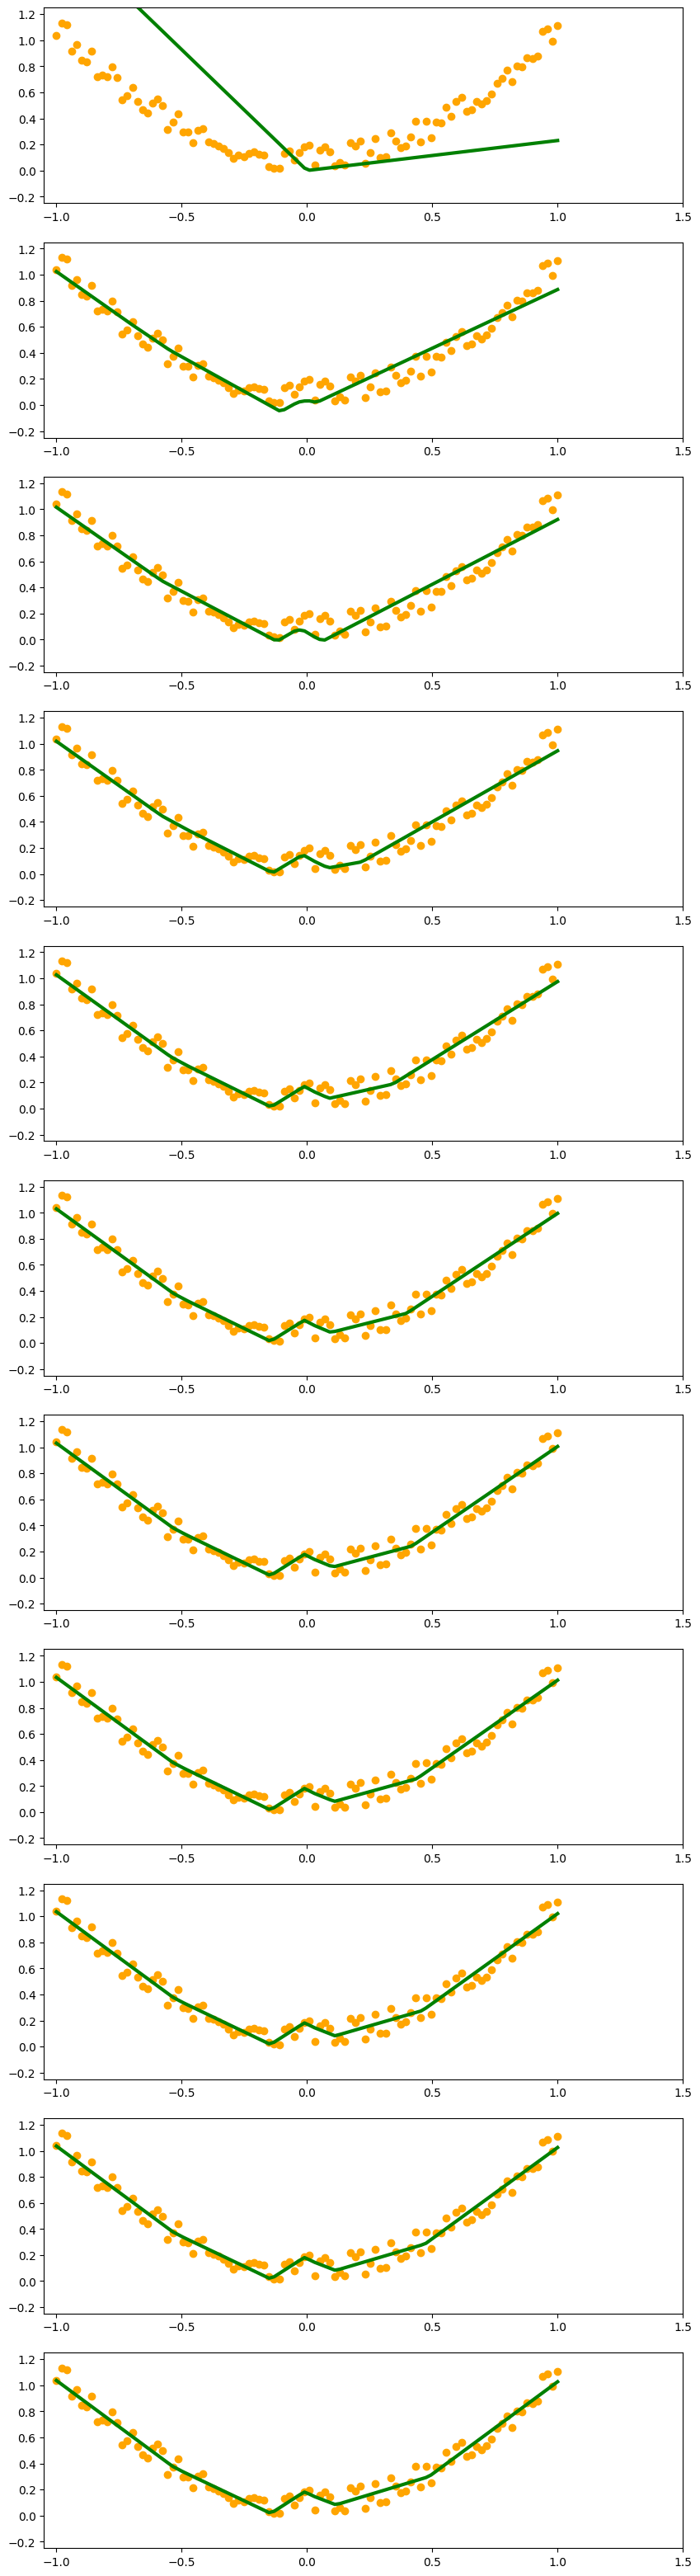

In [40]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)

Размер обучающей выборки: torch.Size([120, 4])
Размер тестовой выборки: torch.Size([30, 4])
Количество классов: 3

Начинаем обучение...
Эпоха 20/200, Loss: 0.3600, Test Accuracy: 0.8000
Эпоха 40/200, Loss: 0.1263, Test Accuracy: 0.9333
Эпоха 60/200, Loss: 0.0656, Test Accuracy: 1.0000
Эпоха 80/200, Loss: 0.0592, Test Accuracy: 1.0000
Эпоха 100/200, Loss: 0.0585, Test Accuracy: 0.9667
Эпоха 120/200, Loss: 0.0483, Test Accuracy: 1.0000
Эпоха 140/200, Loss: 0.0453, Test Accuracy: 1.0000
Эпоха 160/200, Loss: 0.0473, Test Accuracy: 1.0000
Эпоха 180/200, Loss: 0.0443, Test Accuracy: 1.0000
Эпоха 200/200, Loss: 0.0462, Test Accuracy: 1.0000

Финальная точность на тестовой выборке: 100.00%


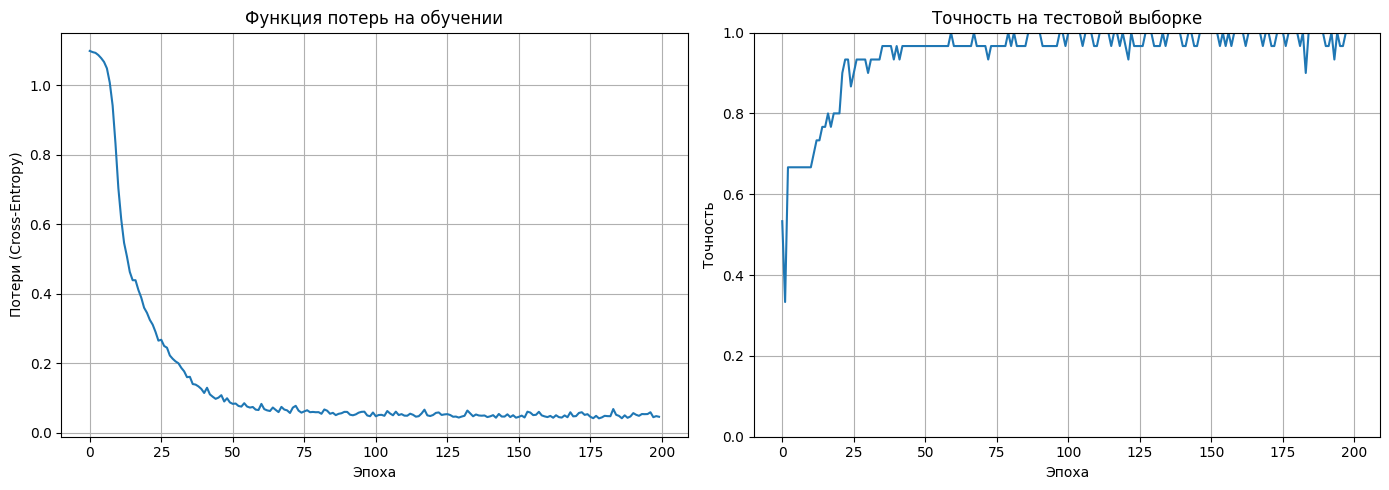


--- Детальный анализ ---
Названия классов: ['setosa' 'versicolor' 'virginica']

Матрица ошибок (строки - истинные классы, столбцы - предсказанные):
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

--- Примеры предсказаний (первые 10 тестовых образцов) ---
Истинный: setosa     | Предсказанный: setosa     | ✓
Истинный: virginica  | Предсказанный: virginica  | ✓
Истинный: versicolor | Предсказанный: versicolor | ✓
Истинный: versicolor | Предсказанный: versicolor | ✓
Истинный: setosa     | Предсказанный: setosa     | ✓
Истинный: versicolor | Предсказанный: versicolor | ✓
Истинный: setosa     | Предсказанный: setosa     | ✓
Истинный: setosa     | Предсказанный: setosa     | ✓
Истинный: virginica  | Предсказанный: virginica  | ✓
Истинный: versicolor | Предсказанный: versicolor | ✓


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Используем классы из ноутбука (ячейки 33 и 39)
# Копируем их сюда для полноты кода

class Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = torch.randn(n_inputs, n_neurons, requires_grad=False) * 0.1  # Уменьшил инициализацию
        self.biases = torch.zeros(n_neurons, requires_grad=False)
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = self.inputs @ self.weights + self.biases
        return self.output

    def backward(self, dvalues):
        with torch.no_grad():
            self.dweights = self.inputs.T @ dvalues
            self.dbiases = torch.sum(dvalues, dim=0)
            self.dinputs = dvalues @ self.weights.T

class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output
    
    def backward(self, dvalues):
        with torch.no_grad():
            self.dinputs = dvalues.clone()
            self.dinputs[self.inputs <= 0] = 0

# Класс для линейной активации (для выходного слоя)
class Activation_Linear:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs

    def backward(self, dvalues):
        with torch.no_grad():
            self.dinputs = dvalues.clone()

# Базовый класс Loss
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = sample_losses.mean()
        return data_loss

# Класс для CrossEntropyLoss (вручную)
class CrossEntropyLoss(Loss):
    def forward(self, y_pred, y_true):
        # Стабильный Softmax
        exp = torch.exp(y_pred - torch.max(y_pred, dim=1, keepdim=True)[0])
        probs = exp / exp.sum(dim=1, keepdim=True)
        
        # Логарифмируем и берем вероятности правильных классов
        batch_size = len(y_true)
        self.probs = probs
        self.y_true = y_true
        correct_probs = probs[range(batch_size), y_true]
        return -torch.log(correct_probs + 1e-7)  # +1e-7 для стабильности
    
    def backward(self, dvalues, y_true):
        with torch.no_grad():
            batch_size = len(y_true)
            self.dinputs = self.probs.clone()
            self.dinputs[range(batch_size), y_true] -= 1
            self.dinputs /= batch_size  # Нормируем на размер батча

# ============== ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ ==============

# Загружаем датасет Iris
iris = load_iris()
X, y = iris.data, iris.target

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабируем признаки (важно для нейросетей!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразуем в тензоры PyTorch
X_train = torch.from_numpy(X_train).to(dtype=torch.float32)
X_test = torch.from_numpy(X_test).to(dtype=torch.float32)
y_train = torch.from_numpy(y_train).to(dtype=torch.long)
y_test = torch.from_numpy(y_test).to(dtype=torch.long)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Количество классов: {len(np.unique(y))}")

# ============== СОЗДАНИЕ МОДЕЛИ ==============

# Создаем слои сети
# Архитектура: 4 входа -> 10 нейронов (ReLU) -> 8 нейронов (ReLU) -> 3 выхода (линейный)
layer1 = Dense(4, 10)      # Входной слой
activation1 = Activation_ReLU()
layer2 = Dense(10, 8)      # Скрытый слой
activation2 = Activation_ReLU()
layer3 = Dense(8, 3)       # Выходной слой
activation3 = Activation_Linear()  # Линейная активация для выходного слоя

loss_fn = CrossEntropyLoss()

# Параметры обучения
learning_rate = 0.1
epochs = 200
batch_size = 16

train_losses = []
test_accuracies = []

# ============== ЦИКЛ ОБУЧЕНИЯ ==============

print("\nНачинаем обучение...")
for epoch in range(epochs):
    
    # --- Обучение на батчах ---
    epoch_loss = 0
    num_batches = 0
    
    # Перемешиваем данные (создаем индексы)
    indices = torch.randperm(len(X_train))
    
    for i in range(0, len(X_train), batch_size):
        batch_indices = indices[i:i+batch_size]
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]
        
        # Прямой проход
        out = layer1.forward(X_batch)
        out = activation1.forward(out)
        out = layer2.forward(out)
        out = activation2.forward(out)
        out = layer3.forward(out)
        # activation3.forward(out) - не нужен, т.к. Linear не меняет данные
        
        # Вычисление потерь
        loss = loss_fn.calculate(out, y_batch)
        epoch_loss += loss.item()
        num_batches += 1
        
        # Обратный проход
        loss_fn.backward(out, y_batch)
        activation3.backward(loss_fn.dinputs)
        layer3.backward(activation3.dinputs)
        activation2.backward(layer3.dinputs)
        layer2.backward(activation2.dinputs)
        activation1.backward(layer2.dinputs)
        layer1.backward(activation1.dinputs)
        
        # Обновление параметров
        with torch.no_grad():
            layer1.weights -= learning_rate * layer1.dweights
            layer1.biases -= learning_rate * layer1.dbiases
            layer2.weights -= learning_rate * layer2.dweights
            layer2.biases -= learning_rate * layer2.dbiases
            layer3.weights -= learning_rate * layer3.dweights
            layer3.biases -= learning_rate * layer3.dbiases
    
    avg_loss = epoch_loss / num_batches
    train_losses.append(avg_loss)
    
    # --- Оценка на тестовой выборке ---
    with torch.no_grad():
        # Прямой проход на всех тестовых данных
        out = layer1.forward(X_test)
        out = activation1.forward(out)
        out = layer2.forward(out)
        out = activation2.forward(out)
        out = layer3.forward(out)
        
        # Получаем предсказанные классы
        predictions = torch.argmax(out, dim=1)
        
        # Считаем точность
        accuracy = (predictions == y_test).float().mean().item()
        test_accuracies.append(accuracy)
    
    # Выводим прогресс каждые 20 эпох
    if (epoch + 1) % 20 == 0:
        print(f"Эпоха {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}")

# ============== ФИНАЛЬНАЯ ОЦЕНКА ==============

print(f"\nФинальная точность на тестовой выборке: {accuracy*100:.2f}%")

# Визуализация процесса обучения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График потерь
ax1.plot(train_losses)
ax1.set_xlabel('Эпоха')
ax1.set_ylabel('Потери (Cross-Entropy)')
ax1.set_title('Функция потерь на обучении')
ax1.grid(True)

# График точности
ax2.plot(test_accuracies)
ax2.set_xlabel('Эпоха')
ax2.set_ylabel('Точность')
ax2.set_title('Точность на тестовой выборке')
ax2.grid(True)
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Детальный анализ
print("\n--- Детальный анализ ---")
print(f"Названия классов: {iris.target_names}")

# Матрица ошибок (confusion matrix)
out = layer1.forward(X_test)
out = activation1.forward(out)
out = layer2.forward(out)
out = activation2.forward(out)
out = layer3.forward(out)
predictions = torch.argmax(out, dim=1)

confusion = torch.zeros(3, 3, dtype=torch.int32)
for i in range(len(y_test)):
    confusion[y_test[i], predictions[i]] += 1

print("\nМатрица ошибок (строки - истинные классы, столбцы - предсказанные):")
print(confusion.numpy())

print("\n--- Примеры предсказаний (первые 10 тестовых образцов) ---")
for i in range(min(10, len(X_test))):
    true_class = iris.target_names[y_test[i]]
    pred_class = iris.target_names[predictions[i]]
    correct = "✓" if y_test[i] == predictions[i] else "✗"
    print(f"Истинный: {true_class:10} | Предсказанный: {pred_class:10} | {correct}")